<a href="https://colab.research.google.com/github/Alvina-Biji/interview/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1
Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.
Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Much better experience this ...
1,✅ Trip Verified | Once again a terrible busine...
2,✅ Trip Verified | BA A380's are showing their...
3,✅ Trip Verified | Credit to BA - Flew to Sin...
4,✅ Trip Verified | The check in area for prem...




Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.


In [ ]:
df

,reviews
0,✅ Trip Verified | Much better experience this ...
1,✅ Trip Verified | Once again a terrible busine...
2,✅ Trip Verified | BA A380's are showing their...
3,✅ Trip Verified | Credit to BA - Flew to Sin...
4,✅ Trip Verified | The check in area for prem...
...,...
995,✅ Trip Verified | A380 boarding is always a ni...
996,✅ Trip Verified | \r\nThe 2-3-2 seating in the...
997,✅ Trip Verified | London to Johannesburg. Smo...
998,✅ Trip Verified | BA836 on 19 Jan. Excellent ...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Much better experience this time around. Flew...
1,Once again a terrible business class experien...
2,"BA A380's are showing their age, hopefully t..."
3,Credit to BA - Flew to Singapore recently a...
4,The check in area for premium classes at Ga...
...,...
995,"A380 boarding is always a nightmare, but it w..."
996,\r\nThe 2-3-2 seating in the front section of...
997,London to Johannesburg. Smooth check in via ...
998,BA836 on 19 Jan. Excellent short flight from...




Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words


Step 1: Cleaning the text

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...
1,Once again a terrible business class experien...,Once again a terrible business class experien...
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...


Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).


Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.



Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.


Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, a), (better, a), (experience, n), (tim..."
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex..."
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull..."
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ..."
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, a), (better, a), (experience, n), (tim...",Much good experience time around Flew CPT LH...
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex...",terrible business class experience BA flight...
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes...",check area premium class Gatwick nice queue ...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Much better experience this time around. Flew...,Much good experience time around Flew CPT LH...
1,Once again a terrible business class experien...,terrible business class experience BA flight...
2,"BA A380's are showing their age, hopefully t...",BA show age hopefully update interior soon l...
3,Credit to BA - Flew to Singapore recently a...,Credit BA Flew Singapore recently also back ...
4,The check in area for premium classes at Ga...,check area premium class Gatwick nice queue ...
...,...,...
995,"A380 boarding is always a nightmare, but it w...",boarding always nightmare complicate occasio...
996,\r\nThe 2-3-2 seating in the front section of...,seating front section Club World upper deck ...
997,London to Johannesburg. Smooth check in via ...,London Johannesburg Smooth check via Club Wo...
998,BA836 on 19 Jan. Excellent short flight from...,BA Jan Excellent short flight Heathrow Dubli...


Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, a), (better, a), (experience, n), (tim...",Much good experience time around Flew CPT LH...,0.9937,Positive
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, a), (business, n), (class, n), (ex...",terrible business class experience BA flight...,-0.9287,Negative
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...,0.9100,Positive
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...,0.9702,Positive
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, a), (classes...",check area premium class Gatwick nice queue ...,0.9940,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    481
Negative    410
Neutral     109
Name: Analysis, dtype: int64

Visual Representation


([<matplotlib.patches.Wedge at 0x7e313f8105b0>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.43051100546777216, -1.0122550440334335, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.23482418480060296, -0.5521391149273273, '41.0%'),
  Text(0.8006492579540364, -0.28541332438702105, '10.9%')])

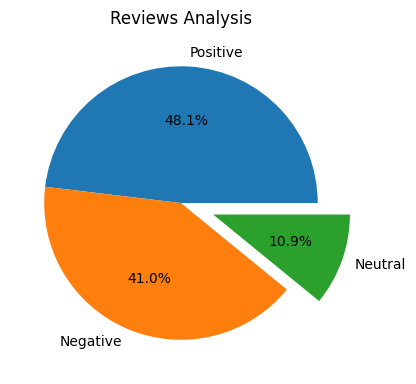

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

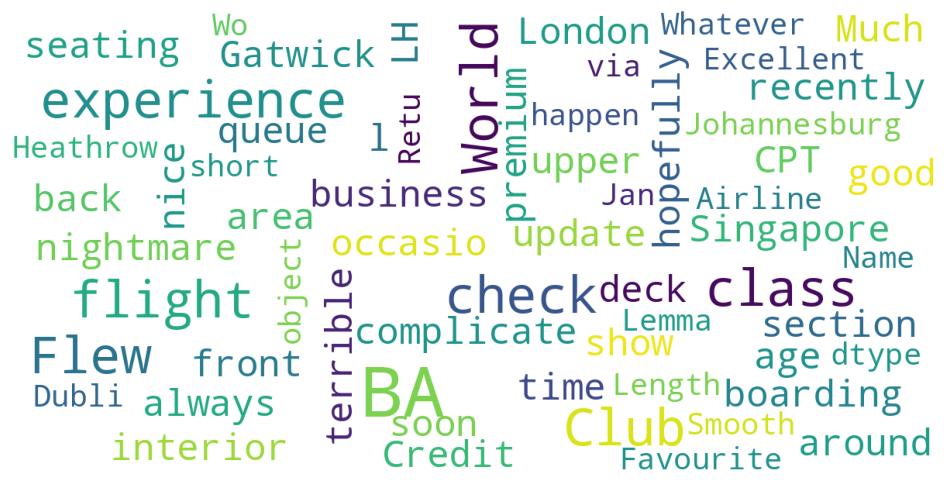

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)